## Preliminaries

In [30]:
# from sympy import laplace_initial_conds, inverse_laplace_transform

# PHY 210 Laplace Transform and Inverse Laplace Transform Notebook
Template for Solving Ordinary Differential Equations By Laplace Transform

## step 0: import needed Python tools

### important standard packages by selecting cell and then clicking run button 

In [23]:
# import Numerical Python (NumPy)
import numpy as np

# create a low-distraction space
import warnings
warnings.filterwarnings('ignore')

In [24]:
# import Symbolic Python (SymPy)
# from sympy import Function, dsolve, Derivative, checkodesol  (use this if you don't want to import the enire SymPy package) 
from sympy import * # Use the Symbolic Python (SymPy) package
from sympy import init_printing # use LaTeX style typesetting of output
init_printing() # turn on typesetting 

In [25]:
%%html
<style>
table {float:left}
</style>

### now  import Laplace transform function and define symbols you will use 

In [26]:
from sympy import laplace_transform as L

In [5]:
# define independent variables and constants
t = symbols('t',real=True)
s = symbols('s',complex=True)
b = symbols('b', real = True, positive=True) # constant

# define dependent variables and functions
x = Function('x')(t)
X_s = symbols('X_s') 

y = Function('y')(t)
Y_s = symbols('Y_s')

#### run this cell to install code that allows you to specify initial conditions 

In [6]:
# run this cell to install code that allows you to specify initial conditions 
# this is a workaround we need to assign initial conditions 
# b/c laplace_initial_conds is missing from this Python installation on JupyterHub

def apply_initial_conditions(L,ic):
    wf = Wild('f')
    lw = LaplaceTransform(wf,t,s)
    ll=L.find(lw)
    for l in ll: 
        lz=l.match(lw)[wf]
    newL = L
    icl = [lz.diff(t,i).subs(t,0) for i in range(0,len(ic))]
    for i in range(0,len(ic)):
        newL = newL.replace(icl[i],ic[i])
    return(newL)

#  Homogeneous Differential Equations

## step 1 create an expression for LHS of the ODE

The expression below assumes you have a differential equation in terms of x(t) and its derivatives. Replace the expression below with your own expression. 
You don't need to specify that RHS = 0 since homogeneous. 

In [7]:
# replace this expression with your own expression! 
# expression = x.diff(t,2)+9*x (leave this here for reference)
expression = x.diff(t,2)+9*x

## step 2 take the Laplace transform
This will give you an algebraic equation in terms of $s$ and $\cal{L}\left[{x(t)}\right]$ 

In [8]:
# take the Laplace transform of our homogeneous differential equation
Laplace = laplace_transform(expression,t,s)[0]

In [9]:
#  apply initial conditions [ x(0), x'(0) ] 
X = apply_initial_conditions(Laplace, [2, 5])
X

now we want to rewrite $\cal{L}\left[{x(t)}\right]$ as $X(s)$

In [10]:
# write in more compact form
transformed_eq = X.subs(L(x,t,s, noconds=True), X_s)
transformed_eq

## step 3 solve for X(s) 

In [11]:
# solve for X_s
X_s_solution = solve(transformed_eq, X_s)[0]
X_s_solution

In [12]:
# now find inverse Laplace transform! 
result=inverse_laplace_transform(X_s_solution, s, t)
result

## step 4 take inverse Laplace transform of X(s) to find  x(t) 

In [13]:
# note that $\theta(t)$ is how SymPy writes the Heaviside step function 

# How to solve inhomogeneous equations

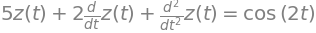

In [14]:
z = Function('z')

# The Laplace transform of z(t) is often represented as Z(s)
Z = Function('Z')(s)
Z_s = symbols('Z_s') 

# Define the differential equation
ode = Eq(z(t).diff(t, 2) + 2*z(t).diff(t, 1) + 5*z(t), cos(2*t))
ode

In [15]:
# Apply Laplace transform to both sides
transformed_lhs = laplace_transform(ode.lhs, t, s, noconds=True)
transformed_rhs = laplace_transform(ode.rhs, t, s, noconds=True)

# Create the new algebraic equation in the Laplace domain
laplace_eq = Eq(transformed_lhs, transformed_rhs)
print("\nTransformed equation in the s-domain (with unevaluated initial conditions):")

laplace_eq



Transformed equation in the s-domain (with unevaluated initial conditions):


In [16]:
result= apply_initial_conditions(laplace_eq, [2, 5])
print(result)

Eq(s**2*LaplaceTransform(z(t), t, s) + 2*s*LaplaceTransform(z(t), t, s) - 2*s + 5*LaplaceTransform(z(t), t, s) - 9, s/(s**2 + 4))


In [17]:
toad = result.subs(LaplaceTransform(z(t), t, s), Z_s)

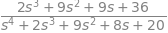

In [18]:
Z_s_solution = solve(toad, Z_s)[0]
Z_s_solution

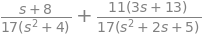

In [19]:
# if you are curious, you can try to use partial fractions to simplify the expression here
Z_s_solution.apart(s)

In [20]:
# now let's find the inverse laplace transform (if it exists!) 

In [21]:
Z_t= inverse_laplace_transform(Z_s_solution, s, t)
Z_t

In [22]:
Z_t.expand()

success! remember that $\theta(t)$ is the Heaviside step function, so it equals 1 for $t \ge 0$.  We usually leave it out but here it is included to remind you that the transform assumes $t>0$ . 